In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,May_2,November_7,May_9,July_7,October_6,March_4,May_5,April_8,November,March_2,...,January,July_5,March_3,July,December_2,November_6,November_9,August_2,April_2,February
0,-0.456360,0.073594,-0.716983,-0.247818,0.266111,-0.062858,-0.409467,-0.014352,0.096351,0.510411,...,0.398386,-0.052737,-0.478982,-0.322279,-0.468110,0.260434,-0.322899,-0.481466,-0.044647,0.253996
1,0.332166,0.073594,-0.600944,-0.247818,0.266111,-0.027647,-0.168900,-0.082749,0.096351,0.027248,...,0.342851,-0.052737,-0.639056,-0.322279,-0.468110,0.260434,-0.322899,-0.481466,-0.382810,0.285447
2,0.030945,0.207152,-1.118022,-0.379068,0.164306,0.008277,-0.550947,-0.261384,-0.218011,-0.026327,...,0.130251,0.162897,-0.389747,-0.433513,-0.370937,0.665407,0.124181,-0.173318,-0.315192,-0.030624
3,0.290044,0.329676,-0.522947,-0.450744,0.256191,-0.231707,0.108472,-0.245163,-0.267691,0.293822,...,0.475150,0.352314,-0.333498,-0.415735,-0.108260,0.712710,-0.116738,-0.576161,-0.686302,0.616793
4,0.402890,0.089461,-0.877231,-0.380579,0.303512,0.035182,-0.527781,0.390409,-0.853638,0.351204,...,-0.519542,0.073374,-0.422012,-0.252876,-0.542477,0.719603,-0.312628,-0.159279,-0.896381,0.091247
5,0.230979,-0.061063,-0.664730,-0.381681,0.194712,-0.287736,-0.297511,-0.029843,-0.460603,-0.160607,...,0.059722,-0.156800,-0.661736,0.032659,-0.282533,0.383175,-0.081865,-0.300303,-0.469524,-0.071780
6,0.322157,0.608538,-0.505595,-0.317771,0.235005,-0.288759,-0.367218,-0.016462,-0.569302,0.268486,...,0.371504,0.232124,-0.729963,-0.030021,-0.477253,0.724654,-0.273163,0.090729,-0.114103,0.477344
7,0.354008,0.352647,-0.741585,-0.593889,0.091647,-0.703806,-0.114192,0.390147,-0.455045,0.053775,...,0.692052,0.163635,-0.592157,-0.821699,0.073621,0.570346,-0.066174,-0.346778,-0.048165,0.651600
8,0.327928,0.240825,-0.521199,-0.244532,0.188610,-0.533328,0.240122,-0.364563,-0.491130,0.112628,...,0.256398,0.377283,-0.394188,-0.468583,-0.825234,0.743389,-0.111520,-0.154990,-0.654722,0.304319
9,0.192342,0.229326,-0.272887,-0.172238,0.372488,-0.393036,-0.279585,0.421437,-0.381082,0.100827,...,0.154545,-0.040131,-0.730159,-0.173472,-0.337817,0.103996,-0.075404,-0.436369,-0.185617,0.492732


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :15]
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.88665970e+00, -4.95579236e-01, -6.83315842e-01,
         5.41630833e-01,  7.30308831e-01,  1.02521255e+00,
        -7.78329576e-01, -4.96627115e-01,  1.85431768e+00,
         1.72017970e+00,  6.97894032e-01,  3.36065980e-01,
         1.06117949e+00,  1.34013031e+00, -1.90761157e-01],
       [ 8.47134604e-01, -4.95579236e-01, -2.23764939e-01,
         5.41630833e-01,  7.30308831e-01,  1.15467839e+00,
         2.95853325e-01, -7.32118035e-01,  1.85431768e+00,
        -4.18747741e-01,  2.54279284e-01, -5.82141663e-01,
         5.36930341e-01, -5.42554378e-01, -1.90761157e-01],
       [-1.97189420e-01,  1.55035944e-01, -2.27154884e+00,
        -1.54384247e-01,  3.98539064e-01,  1.28676298e+00,
        -1.41006267e+00, -1.34716430e+00,  5.90571766e-01,
        -6.55917737e-01, -1.27076587e+00, -5.61169926e-01,
         2.74162839e-01,  7.77674239e-01,  4.02066802e-01],
       [ 7.01099422e-01,  7.51902334e-01,  8.51264880e-02,
        -5.34480143e-01,  6.97979443e-01,  4.04386592

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :15]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.24588522,  0.76394331, -0.16721834, -0.31439331, -0.3818113 ,
         0.16895666,  0.18873435, -0.21443535, -0.5111478 ,  0.02552984,
        -0.66170792, -1.27662941, -0.39594483,  0.18878097, -0.41930799],
       [-0.60659105, -1.30714695,  0.32110121, -0.68045246, -0.3404452 ,
        -2.67712018,  0.67346756, -0.33652383, -0.28498908,  0.59396875,
         2.63531981, -1.3258627 , -0.39179607, -0.39847144,  0.45082673],
       [-0.93532379,  1.387898  ,  1.39379247, -0.83790653,  1.04714211,
         1.5075837 , -0.61966722,  0.47619149,  1.93100532,  1.39100504,
         0.37108225, -1.9322543 , -1.134134  , -1.66520761, -1.4886439 ],
       [-1.14191634,  0.37903954, -0.84887922, -0.15639512,  1.21528913,
        -1.13473856, -0.79063752,  0.38971326, -0.10218841, -1.11688742,
         1.26102421,  0.02231199, -1.0250186 ,  1.29229625, -0.52837191],
       [-0.52503341,  0.62191228,  0.32606883, -0.85420985, -0.49292467,
         0.08983946, -1.06460055, -0.16651176, 

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 36}
Best Score: 0.40486983425551365
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.2633203580598578
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 11}
Best Score: 0.31766234074799105
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 35}
Best Score: 0.20175188441961245
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 39}
Best Score: 0.37209969979106977


In [13]:
y_pred_list

[array([-0.25011067, -0.08161559, -0.27461043,  0.03676117, -0.12305604,
        -0.02245   , -0.10923417, -0.54189578,  0.27436881, -0.3525473 ,
        -0.09616082, -0.19534929, -0.33585712,  0.03852549,  0.55965606,
        -0.05137499]),
 array([-0.33266517, -0.02554761, -0.09856378, -0.01301625,  0.02344249,
         0.36316078, -0.09164382, -0.53217046, -0.00336323, -0.49956218,
        -0.31967183, -0.40948709, -0.25152374, -0.0248739 ,  0.34418323,
        -0.00545055]),
 array([-0.47080401, -0.00452935,  0.02448321, -0.09322184, -0.06177841,
        -0.02062809, -0.28203419, -0.10135196,  0.0206406 , -0.40953587,
        -0.1294718 , -0.38446484, -0.17659612,  0.00689574,  0.26266563,
         0.09886368]),
 array([-0.40813945, -0.07287952, -0.31284811,  0.06496759, -0.12272028,
        -0.1909914 , -0.08857495, -0.69167582,  0.36604244, -0.43216795,
         0.19843469,  0.00823098, -0.31562323,  0.0227043 ,  0.65319097,
         0.12365793]),
 array([-0.44832279, -0.17164187

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7569021758270467,
 0.7208259357109266,
 0.5825596880370535,
 0.5706452657388593,
 0.6654236133994154]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SLP (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'SLP Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 36}
Best Score: 0.40486983425551365
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 48}
Best Score: 0.2633203580598578
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 11}
Best Score: 0.31766234074799105
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 35}
Best Score: 0.20175188441961245
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 39}
Best Score: 0.37209969979106977


In [21]:
y_pred_list_rf

[array([-0.25011067, -0.08161559, -0.27461043,  0.03676117, -0.12305604,
        -0.02245   , -0.10923417, -0.54189578,  0.27436881, -0.3525473 ,
        -0.09616082, -0.19534929, -0.33585712,  0.03852549,  0.55965606,
        -0.05137499]),
 array([-0.33266517, -0.02554761, -0.09856378, -0.01301625,  0.02344249,
         0.36316078, -0.09164382, -0.53217046, -0.00336323, -0.49956218,
        -0.31967183, -0.40948709, -0.25152374, -0.0248739 ,  0.34418323,
        -0.00545055]),
 array([-0.47080401, -0.00452935,  0.02448321, -0.09322184, -0.06177841,
        -0.02062809, -0.28203419, -0.10135196,  0.0206406 , -0.40953587,
        -0.1294718 , -0.38446484, -0.17659612,  0.00689574,  0.26266563,
         0.09886368]),
 array([-0.40813945, -0.07287952, -0.31284811,  0.06496759, -0.12272028,
        -0.1909914 , -0.08857495, -0.69167582,  0.36604244, -0.43216795,
         0.19843469,  0.00823098, -0.31562323,  0.0227043 ,  0.65319097,
         0.12365793]),
 array([-0.44832279, -0.17164187

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7569021758270467,
 0.7208259357109266,
 0.5825596880370535,
 0.5706452657388593,
 0.6654236133994154]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SLP (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'SLP Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/SLP/15 predictors/pearson/comparison plots/randomforest


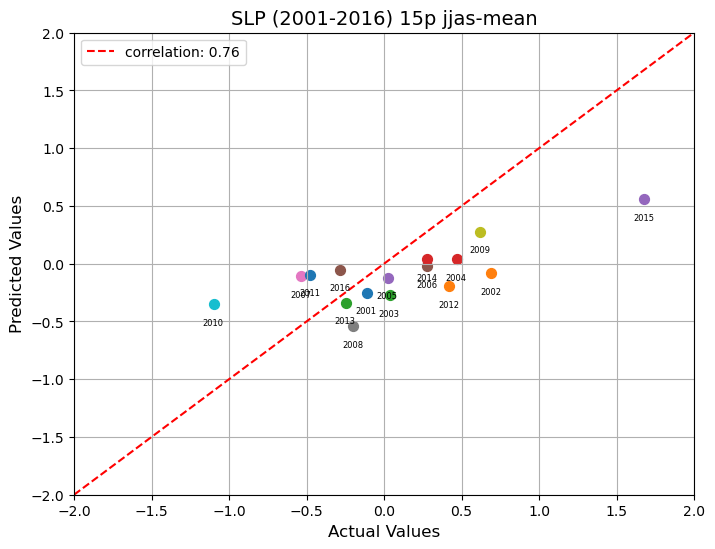

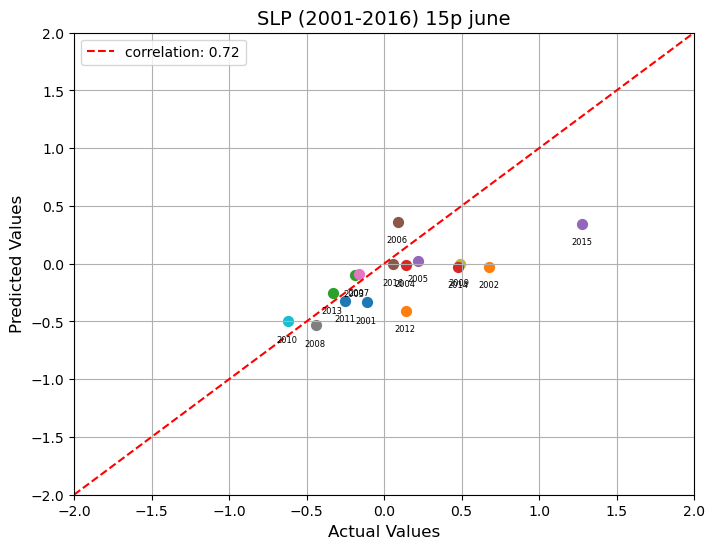

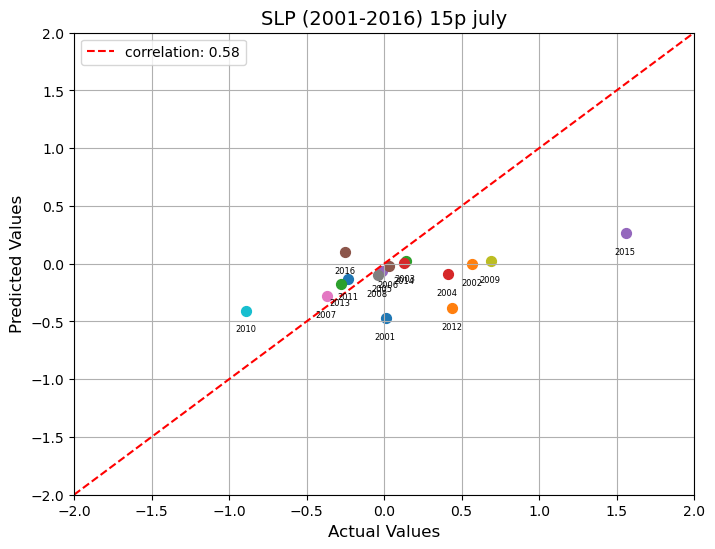

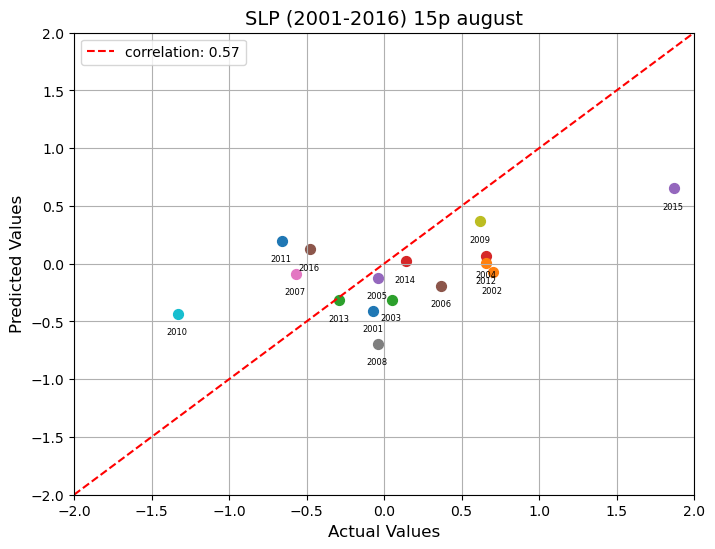

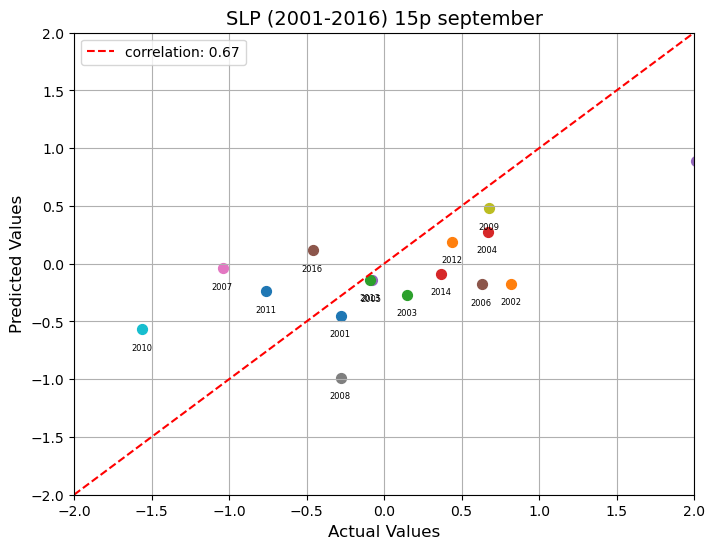

In [27]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'SLP (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show